In [1]:
import matplotlib.pyplot as plt
import numpy as np
from util.util import get_poly, polynomial_matrix

# Polynomial regression


In [2]:
x,y = get_poly()

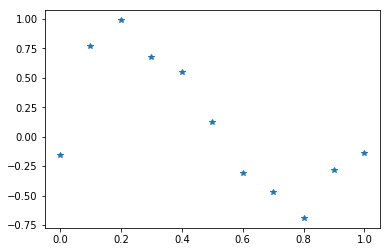

In [4]:
plt.figure()
plt.plot(x,y,'*')
plt.show()

In [5]:
Q = polynomial_matrix(x,degree=3)
print(Q)

[[ 1.     0.     0.     0.   ]
 [ 1.     0.1    0.01   0.001]
 [ 1.     0.2    0.04   0.008]
 [ 1.     0.3    0.09   0.027]
 [ 1.     0.4    0.16   0.064]
 [ 1.     0.5    0.25   0.125]
 [ 1.     0.6    0.36   0.216]
 [ 1.     0.7    0.49   0.343]
 [ 1.     0.8    0.64   0.512]
 [ 1.     0.9    0.81   0.729]
 [ 1.     1.     1.     1.   ]]


In [7]:
def poly_fit(x, y, degree):
    Q = polynomial_matrix(x,degree)
    Q=np.matrix(Q)
    Y=np.matrix(y).T
    w=np.linalg.inv(Q.T*Q)*Q.T*Y
    return w

In [8]:
w=poly_fit(x,y,degree=3)
print(w)

[[ -0.03383332]
 [  8.7796384 ]
 [-24.72206254]
 [ 15.97443292]]


In [10]:
def poly_predict(x, w):
    Q = np.matrix(polynomial_matrix(x,degree=len(w)-1))
    y=Q*w
    return np.asarray(y).flatten()

In [12]:
y_pred=poly_predict(x,w)

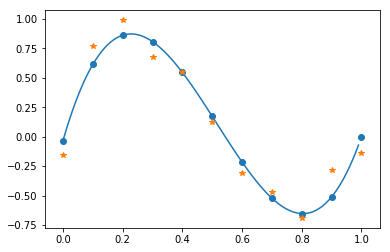

In [13]:
xx=np.arange(0,1,0.01)
yy=poly_predict(xx,w)

plt.figure()
plt.plot(xx,yy,'-')
plt.plot(x,y,'*')
plt.scatter(x,y_pred)
plt.show()

In [15]:
def score(y,prediction):
    Y = np.matrix(y)
    Y_P = np.matrix(prediction)
    u = Y_P - Y
    rmse=np.sqrt((u*u.T)/len(u))
    return rmse.item()

In [16]:
score(y,y_pred)

0.39809762642900637

# k-fold crossvalidation

In [18]:
from sklearn.model_selection import KFold
# 4-fold crossvalidation
kf = KFold(n_splits=4)

avscore = list()


for i in range(1,10):
    
    listfolds = list()
    

    for train_index, test_index in kf.split(x):

       
        xtrain = x[train_index]
        ytrain = y[train_index]
        w = poly_fit(xtrain,ytrain,i)
        
        xtest = x[test_index]
   
        ytest = y[test_index]
        
        ypred = poly_predict(xtest,w)

        scoretmp = score(ytest,ypred)
        
        listfolds.append(scoretmp)
    
 
    foldsarray = np.array(listfolds)
    foldsarray = np.array(listfolds)
    avtmp = np.mean(foldsarray)
    avscore.append(avtmp)


print (avscore)
print("Best degree: ",avscore.index(min(avscore))+1)

[0.87582045970723899, 2.0463656810675444, 0.44439549375165954, 1.9799060636454544, 0.82822778624401072, 17.845396125035808, 86.825460432938613, 65.462823485406318, 110.28284389724132]
Best degree:  3


In [19]:


from sklearn.model_selection import LeaveOneOut
kf = LeaveOneOut()
#print(kf.get_n_splits(x))
avscore = list()


for i in range(1,10):
    #print(i
    listfolds = list()

    for train_index, test_index in kf.split(x):

        
        xtrain = x[train_index]
        ytrain = y[train_index]
        w = poly_fit(xtrain,ytrain,i)
        
        xtest = x[test_index]
   
        ytest = y[test_index]
        
        ypred = poly_predict(xtest,w)
        

        scoretmp = score(ytest,ypred)
        
        listfolds.append(scoretmp)
    
   
    foldsarray = np.array(listfolds)
    foldsarray = np.array(listfolds)
    avtmp = np.mean(foldsarray)
    avscore.append(avtmp)


print (avscore)
print("Best degree: ",avscore.index(min(avscore))+1)

[0.43717946643915356, 0.55957339913753135, 0.22354211416714478, 0.15325107261278206, 0.30540547368911475, 0.32754643460237204, 0.47424759631924585, 3.548285806182196, 0.68632196829625225]
Best degree:  4
